## Imports

In [1]:
import pandas as pd

import numpy as np

from nilearn import plotting
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm.second_level import SecondLevelModel
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img
from nilearn import surface
from nilearn import datasets
from nilearn.reporting import get_clusters_table
from nilearn.image import resample_to_img
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
#from nilearn.maskers import NiftiLabelsMasker

import glob

from natsort import natsorted

import matplotlib.pyplot as plt

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
fsaverage = datasets.fetch_surf_fsaverage(data_dir='./fsaverage/')

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/image/image.py:756: FutureWarning: Image data has type int64, which may cause incompatibilities with other tools. This will error in NiBabel 5.0. This warning can be silenced by passing the dtype argument to Nifti1Image().
  return klass(data, affine, header=header)


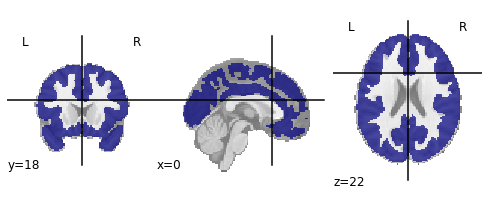

In [4]:
sample = './openNeuro_LPP/english/subj057/section15.nii.gz'

Yeo = 'Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz'
resampled_Yeo = resample_to_img(source_img=Yeo, target_img=sample,interpolation='nearest')


parcelation_masker = NiftiLabelsMasker(labels_img=resampled_Yeo)
time_series = parcelation_masker.fit_transform(sample)

resampled_yeo_binary = parcelation_masker.inverse_transform([[1,1,1,1,1,1,1]])
plotting.plot_roi(resampled_yeo_binary,cut_coords=(0,18,22))

## Read in the Regressors

## Chinese Regressors

In [10]:
chinese_regressors = pd.read_csv('lpp_cn_regressors_19Apr2022.tsv',sep = "\t").drop(columns=['subj_relatives','relatives','disc_filler_gap'])
chinese_regressors

,word_rate,rms,freq,f0,obj_relatives,WH,projective_bottomup,chinese_gpt2_surprisal,section
0,0.000000,0.000000,0.000000,0.000000,0.002593,-0.002717,0.020244,-0.089760,1
1,0.003681,0.005161,0.034694,16.586025,0.002482,-0.002677,0.017211,-0.091427,1
2,0.044814,0.062256,0.430535,228.376025,0.001235,-0.002221,0.004095,-0.097853,1
3,0.100376,0.157604,0.955583,594.716556,-0.000449,-0.001606,-0.008063,-0.075665,1
4,0.142764,0.243327,1.327561,866.861677,-0.001734,-0.001137,-0.006474,-0.041610,1
...,...,...,...,...,...,...,...,...,...
2972,0.088587,0.153884,0.759426,916.973736,-0.000235,-0.000522,-0.001216,-0.009229,9
2973,0.104723,0.166189,0.920115,874.126927,-0.000447,-0.000647,-0.003501,-0.019401,9
2974,0.130164,0.166403,1.164731,860.597393,-0.000782,-0.000845,-0.003381,-0.033397,9
2975,0.148257,0.162883,1.304770,854.366261,-0.001021,-0.000986,-0.000174,-0.061724,9


## Standardize by section

In [11]:
chinese_regressors = pd.read_csv('lpp_cn_regressors_19Apr2022.tsv',sep = "\t").drop(columns=['subj_relatives','relatives','disc_filler_gap'])


chinese_regressors1 = chinese_regressors[chinese_regressors.section==1].drop(columns=['section'])
chinese_regressors1 = (chinese_regressors1-chinese_regressors1.mean())/chinese_regressors1.std()
chinese_regressors1['constant'] = np.ones(len(chinese_regressors1))

chinese_regressors2 = chinese_regressors[chinese_regressors.section==2].drop(columns=['section'])
chinese_regressors2 = (chinese_regressors2-chinese_regressors2.mean())/chinese_regressors2.std()
chinese_regressors2['constant'] = np.ones(len(chinese_regressors2))

chinese_regressors3 = chinese_regressors[chinese_regressors.section==3].drop(columns=['section'])
chinese_regressors3 = (chinese_regressors3-chinese_regressors3.mean())/chinese_regressors3.std()
chinese_regressors3['constant'] = np.ones(len(chinese_regressors3))

chinese_regressors4 = chinese_regressors[chinese_regressors.section==4].drop(columns=['section'])
chinese_regressors4 = (chinese_regressors4-chinese_regressors4.mean())/chinese_regressors4.std()
chinese_regressors4['constant'] = np.ones(len(chinese_regressors4))

chinese_regressors5 = chinese_regressors[chinese_regressors.section==5].drop(columns=['section'])
chinese_regressors5 = (chinese_regressors5-chinese_regressors5.mean())/chinese_regressors5.std()
chinese_regressors5['constant'] = np.ones(len(chinese_regressors5))

chinese_regressors6 = chinese_regressors[chinese_regressors.section==6].drop(columns=['section'])
chinese_regressors6 = (chinese_regressors6-chinese_regressors6.mean())/chinese_regressors6.std()
chinese_regressors6['constant'] = np.ones(len(chinese_regressors6))

chinese_regressors7 = chinese_regressors[chinese_regressors.section==7].drop(columns=['section'])
chinese_regressors7 = (chinese_regressors7-chinese_regressors7.mean())/chinese_regressors7.std()
chinese_regressors7['constant'] = np.ones(len(chinese_regressors7))

chinese_regressors8 = chinese_regressors[chinese_regressors.section==8].drop(columns=['section'])
chinese_regressors8 = (chinese_regressors8-chinese_regressors8.mean())/chinese_regressors8.std()
chinese_regressors8['constant'] = np.ones(len(chinese_regressors8))

chinese_regressors9 = chinese_regressors[chinese_regressors.section==9].drop(columns=['section'])
chinese_regressors9 = (chinese_regressors9-chinese_regressors9.mean())/chinese_regressors9.std()
chinese_regressors9['constant'] = np.ones(len(chinese_regressors9))

chinese_design_matrices = [chinese_regressors1,chinese_regressors2,chinese_regressors3,
                          chinese_regressors4,chinese_regressors5,chinese_regressors6,
                          chinese_regressors7,chinese_regressors8,chinese_regressors9,]

for dmx in chinese_design_matrices:
    print(len(dmx))

283
322
322
307
293
392
364
293
401


In [12]:
#number of volumes in each section
n_chinese_scans = [283,322,322,307,293,392,364,293,401]
print(sum(n_chinese_scans))

2977


<AxesSubplot:label='conditions', ylabel='scan number'>

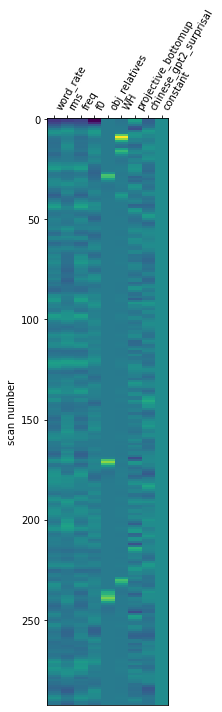

In [13]:
plotting.plot_design_matrix(chinese_design_matrices[7])

## English Regressors

In [14]:
english_regressors = pd.read_csv('lpp_en_regressors_19Apr2022.tsv',sep = "\t").drop(columns=['gpt3_surprisal','chinchilla_surprisal','disc_filler_gap'])
english_regressors

,word_rate,rms,freq,f0,obj_relatives,WH,projective_bottomup,gpt2_surprisal,section
0,0.000000,0.000000,0.000000,0.000000,0.004363,-0.002348,-0.017272,-0.211151,1
1,0.000647,0.009437,0.004752,10.491500,0.004331,-0.002343,-0.017427,-0.211895,1
2,0.027805,0.145643,0.208735,179.405197,0.002982,-0.002146,-0.021824,-0.228904,1
3,0.079646,0.367299,0.596170,533.032462,0.000407,-0.001769,-0.020417,-0.254466,1
4,0.117950,0.487003,0.849367,805.795838,-0.001496,-0.001490,-0.038469,-0.181909,1
...,...,...,...,...,...,...,...,...,...
2811,0.110392,0.435250,0.822411,795.012732,-0.000672,-0.001431,0.049302,-0.047509,9
2812,0.112029,0.395219,0.842175,768.481156,-0.000683,-0.001472,0.026709,0.011026,9
2813,0.118791,0.338782,0.917951,671.511479,-0.000729,-0.001643,0.034818,0.103522,9
2814,0.086186,0.190876,0.690954,393.743804,-0.000507,-0.000818,0.050429,0.047821,9


## Standardize by section

In [15]:
english_regressors = pd.read_csv('lpp_en_regressors_19Apr2022.tsv',sep = "\t").drop(columns=['gpt3_surprisal','chinchilla_surprisal','disc_filler_gap'])
english_regressors['constant'] = np.ones(len(english_regressors))


english_regressors1 = english_regressors[english_regressors.section==1].drop(columns=['section'])
english_regressors1 = (english_regressors1-english_regressors1.mean())/english_regressors1.std()
english_regressors1['constant'] = np.ones(len(english_regressors1))

english_regressors2 = english_regressors[english_regressors.section==2].drop(columns=['section'])
english_regressors2 = (english_regressors2-english_regressors2.mean())/english_regressors2.std()
english_regressors2['constant'] = np.ones(len(english_regressors2))

english_regressors3 = english_regressors[english_regressors.section==3].drop(columns=['section'])
english_regressors3 = (english_regressors3-english_regressors3.mean())/english_regressors3.std()
english_regressors3['constant'] = np.ones(len(english_regressors3))

english_regressors4 = english_regressors[english_regressors.section==4].drop(columns=['section'])
english_regressors4 = (english_regressors4-english_regressors4.mean())/english_regressors4.std()
english_regressors4['constant'] = np.ones(len(english_regressors4))

english_regressors5 = english_regressors[english_regressors.section==5].drop(columns=['section'])
english_regressors5 = (english_regressors5-english_regressors5.mean())/english_regressors5.std()
english_regressors5['constant'] = np.ones(len(english_regressors5))

english_regressors6 = english_regressors[english_regressors.section==6].drop(columns=['section'])
english_regressors6 = (english_regressors6-english_regressors6.mean())/english_regressors6.std()
english_regressors6['constant'] = np.ones(len(english_regressors6))

english_regressors7 = english_regressors[english_regressors.section==7].drop(columns=['section'])
english_regressors7 = (english_regressors7-english_regressors7.mean())/english_regressors7.std()
english_regressors7['constant'] = np.ones(len(english_regressors7))

english_regressors8 = english_regressors[english_regressors.section==8].drop(columns=['section'])
english_regressors8 = (english_regressors8-english_regressors8.mean())/english_regressors8.std()
english_regressors8['constant'] = np.ones(len(english_regressors8))

english_regressors9 = english_regressors[english_regressors.section==9].drop(columns=['section'])
english_regressors9 = (english_regressors9-english_regressors9.mean())/english_regressors9.std()
english_regressors9['constant'] = np.ones(len(english_regressors9))


english_design_matrices = [english_regressors1,english_regressors2,english_regressors3,
                          english_regressors4,english_regressors5,english_regressors6,
                          english_regressors7,english_regressors8,english_regressors9,]

for dmx in english_design_matrices:
    print(len(dmx))

282
298
340
303
265
343
325
292
368


In [16]:
#number of volumes in each section
n_english_scans = [282,298,340,303,265,343,325,292,368]
print(sum(n_english_scans))

2816


<AxesSubplot:label='conditions', ylabel='scan number'>

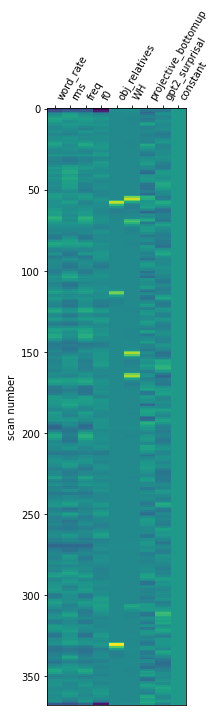

In [17]:
plotting.plot_design_matrix(english_design_matrices[8])

## First-Level GLM models

## Chinese

In [22]:
chinese_subjects = natsorted(glob.glob("openNeuro_LPP/chinese/*"))
#chinese_subjects

In [23]:
natsorted(glob.glob(f"{chinese_subjects[0]}/*"))

['openNeuro_LPP/chinese/subj001/section04.nii.gz',
 'openNeuro_LPP/chinese/subj001/section05.nii.gz',
 'openNeuro_LPP/chinese/subj001/section06.nii.gz',
 'openNeuro_LPP/chinese/subj001/section07.nii.gz',
 'openNeuro_LPP/chinese/subj001/section08.nii.gz',
 'openNeuro_LPP/chinese/subj001/section09.nii.gz',
 'openNeuro_LPP/chinese/subj001/section10.nii.gz',
 'openNeuro_LPP/chinese/subj001/section11.nii.gz',
 'openNeuro_LPP/chinese/subj001/section12.nii.gz']

In [ ]:
for i in range(len(chinese_subjects)):
#for i in range(1):
    try:
        print(chinese_subjects[i])

        chinese_glm = FirstLevelModel(
                    t_r = 2.0,
                    hrf_model='spm',
                    noise_model='ar1',
                    smoothing_fwhm=None,
                    n_jobs=1,
                    standardize=True,
                    verbose=1
                    )
        chinese_glm = chinese_glm.fit(natsorted(glob.glob(f"{chinese_subjects[i]}/*")),
                                     design_matrices=chinese_design_matrices)

        word_rate_eff_map = chinese_glm.compute_contrast(contrast_def='word_rate',output_type='effect_size')
        word_rate_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_word_rate.nii.gz")

        rms_eff_map = chinese_glm.compute_contrast(contrast_def='rms',output_type='effect_size')
        rms_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_rms.nii.gz")

        f0_eff_map = chinese_glm.compute_contrast(contrast_def='f0',output_type='effect_size')
        f0_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_f0.nii.gz")

        
        freq_eff_map = chinese_glm.compute_contrast(contrast_def='freq',output_type='effect_size')
        freq_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_freq.nii.gz")

        bottomUp_eff_map = chinese_glm.compute_contrast(contrast_def='projective_bottomup',output_type='effect_size')
        bottomUp_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_bottomUp.nii.gz")

        
        chinese_surprisal_eff_map = chinese_glm.compute_contrast(contrast_def='chinese_gpt2_surprisal',output_type='effect_size')
        chinese_surprisal_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_chinese_surprisal.nii.gz")
        
        obj_relatives_eff_map = chinese_glm.compute_contrast(contrast_def='obj_relatives',output_type='effect_size')
        obj_relatives_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_obj_relatives_eff.nii.gz")

        WH_eff_map = chinese_glm.compute_contrast(contrast_def='WH',output_type='effect_size')
        WH_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_WH_eff.nii.gz")

        WH_minus_objRel_eff_map = chinese_glm.compute_contrast(contrast_def='WH - obj_relatives',output_type='effect_size')
        WH_minus_objRel_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj{i}_WH_minus_objRel_eff.nii.gz")
    
    
    except:
        print("something went wrong")

## English

In [25]:
english_subjects = natsorted(glob.glob("openNeuro_LPP/english/*"))
english_subjects

['openNeuro_LPP/english/subj057',
 'openNeuro_LPP/english/subj058',
 'openNeuro_LPP/english/subj059',
 'openNeuro_LPP/english/subj061',
 'openNeuro_LPP/english/subj062',
 'openNeuro_LPP/english/subj063',
 'openNeuro_LPP/english/subj064',
 'openNeuro_LPP/english/subj065',
 'openNeuro_LPP/english/subj067',
 'openNeuro_LPP/english/subj068',
 'openNeuro_LPP/english/subj069',
 'openNeuro_LPP/english/subj070',
 'openNeuro_LPP/english/subj072',
 'openNeuro_LPP/english/subj073',
 'openNeuro_LPP/english/subj074',
 'openNeuro_LPP/english/subj075',
 'openNeuro_LPP/english/subj076',
 'openNeuro_LPP/english/subj077',
 'openNeuro_LPP/english/subj078',
 'openNeuro_LPP/english/subj079',
 'openNeuro_LPP/english/subj081',
 'openNeuro_LPP/english/subj082',
 'openNeuro_LPP/english/subj083',
 'openNeuro_LPP/english/subj084',
 'openNeuro_LPP/english/subj086',
 'openNeuro_LPP/english/subj087',
 'openNeuro_LPP/english/subj088',
 'openNeuro_LPP/english/subj089',
 'openNeuro_LPP/english/subj091',
 'openNeuro_LP

In [26]:
natsorted(glob.glob(f"{english_subjects[0]}/*"))

['openNeuro_LPP/english/subj057/section15.nii.gz',
 'openNeuro_LPP/english/subj057/section16.nii.gz',
 'openNeuro_LPP/english/subj057/section17.nii.gz',
 'openNeuro_LPP/english/subj057/section18.nii.gz',
 'openNeuro_LPP/english/subj057/section19.nii.gz',
 'openNeuro_LPP/english/subj057/section20.nii.gz',
 'openNeuro_LPP/english/subj057/section21.nii.gz',
 'openNeuro_LPP/english/subj057/section22.nii.gz',
 'openNeuro_LPP/english/subj057/section23.nii.gz']

In [ ]:
for i in range(len(english_subjects)):
#for i in range(1):
    try:
        print(english_subjects[i])

        english_glm = FirstLevelModel(
                    t_r = 2.0,
                    hrf_model='spm',
                    noise_model='ar1',
                    smoothing_fwhm=None,
                    n_jobs=1,
                    standardize=True,
                    verbose=1
                    )
        english_glm = english_glm.fit(natsorted(glob.glob(f"{english_subjects[i]}/*")),
                                     design_matrices=english_design_matrices)

        word_rate_eff_map = english_glm.compute_contrast(contrast_def='word_rate',output_type='effect_size')
        word_rate_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_word_rate.nii.gz")

        rms_eff_map = english_glm.compute_contrast(contrast_def='rms',output_type='effect_size')
        rms_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_rms.nii.gz")

        f0_eff_map = english_glm.compute_contrast(contrast_def='f0',output_type='effect_size')
        f0_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_f0.nii.gz")

        
        freq_eff_map = english_glm.compute_contrast(contrast_def='freq',output_type='effect_size')
        freq_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_freq.nii.gz")

        bottomUp_eff_map = english_glm.compute_contrast(contrast_def='projective_bottomup',output_type='effect_size')
        bottomUp_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_bottomUp.nii.gz")

        
        english_surprisal_eff_map = english_glm.compute_contrast(contrast_def='gpt2_surprisal',output_type='effect_size')
        english_surprisal_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}english_surprisal.nii.gz")


        obj_relatives_eff_map = english_glm.compute_contrast(contrast_def='obj_relatives',output_type='effect_size')
        obj_relatives_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_obj_relatives_eff.nii.gz")

        WH_eff_map = english_glm.compute_contrast(contrast_def='WH',output_type='effect_size')
        WH_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_WH_eff.nii.gz")

        WH_minus_objRel_eff_map = english_glm.compute_contrast(contrast_def='WH - obj_relatives',output_type='effect_size')
        WH_minus_objRel_eff_map.to_filename(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj{i}_WH_minus_objRel_eff.nii.gz")
    
        
        
    except:
        print("something went wrong")